## Objective
### Main Objective
- Data Collection (Inflation rate, GDP, Inflation Other Countries)
- Data Preprocessing 
- Data Analysis 
### Side Quest
- Data Visualization 
- Data Modeling 

## LIBRARY

In [403]:
# Library DataFrame
import pandas as pd
# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Preprocessing dan analysis
from sklearn.preprocessing import  MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Library Model Development
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import sklearn,pmdarima, prophet

# Library Evaluasi Model
from sklearn.metrics import mean_absolute_percentage_error

sns.set()

# DATA COLLECTION

In [404]:
# Dataset Inflasi From Kaggle
df = pd.read_csv('Indonesia.csv')
df

,TAHUN,INFLASI,GDP
0,1980,18.035430,10.000000
1,1981,12.265909,7.878788
2,1982,9.445424,2.247191
3,1983,11.799741,4.395604
4,1984,10.455035,6.842105
5,1985,4.724536,2.463054
6,1986,5.822667,5.769231
7,1987,9.278656,5.000000
8,1988,8.045367,5.627706
9,1989,6.415540,7.786885


Data dari kagle merupakan data pertahun dari 1980-2022 dan sudah dengan data GDP

In [405]:
## Get other Data from other resources
df_inflasi = pd.read_excel('Data Inflasi.xlsx')
df_inflasi.columns = df_inflasi.iloc[3]
df_inflasi = df_inflasi.iloc[4:][df_inflasi.columns[:3]]
df_inflasi

3,No,Periode,Data Inflasi
4,1,September 2024,1.84 %
5,2,Agustus 2024,2.12 %
6,3,Juli 2024,2.13 %
7,4,Juni 2024,2.51 %
8,5,Mei 2024,2.84 %
...,...,...,...
261,258,April 2003,7.62 %
262,259,Maret 2003,7.17 %
263,260,Februari 2003,7.6 %
264,261,Januari 2003,8.68 %


Data Inflasi dari website BI merupakan inflasi perbulan yang terjadi antara Desember 2002 sampai September 2024

In [406]:
df_gdp = pd.read_csv('indonesia-gdp-growth-rate_macro-trend.csv')
df_gdp

,date,GDP Growth (%),Annual Change,
0,1961-12-31,5.7406,NaN,NaN
1,1962-12-31,1.8420,-3.90,NaN
2,1963-12-31,-2.2370,-4.08,NaN
3,1964-12-31,3.5297,5.77,NaN
4,1965-12-31,1.0816,-2.45,NaN
...,...,...,...,...
58,2019-12-31,5.0193,-0.15,NaN
59,2020-12-31,-2.0655,-7.08,NaN
60,2021-12-31,3.7029,5.77,NaN
61,2022-12-31,5.3074,1.60,NaN


Data GDP dari website macro trend mendapatkan data pertahun, dari 1961 - 2023

In [407]:
# Data BI Interest Rates
df_bi = pd.read_excel('BI-7Day-RR.xlsx')
df_bi

,NO,Tanggal,BI-7Day-RR
0,1,16 Oktober 2024,6.00 %
1,2,18 September 2024,6.00 %
2,3,21 Agustus 2024,6.25 %
3,4,17 Juli 2024,6.25 %
4,5,20 Juni 2024,6.25 %
...,...,...,...
99,100,19 Agustus 2016,5.25 %
100,101,21 Juli 2016,5.25 %
101,102,16 Juni 2016,5.25 %
102,103,19 Mei 2016,5.50 %


Data BI Interest rates yang tersedia dari website BI hanya dari April 2016 sampai oktober 2024

In [408]:
# Data Inflasi other countries
df_inflation_global = pd.read_csv('global_inflation_data.csv')
df_inflation_global

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,Annual average inflation (consumer prices) rate,25.2,69.6,95.4,49.5,64.9,91.6,453.5,360.4,...,0.60,2.70,3.50,3.50,2.8,3.20,1.80,3.20,3.4,3.4
192,West Bank and Gaza,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.40,-0.20,0.20,-0.20,1.6,-0.70,1.20,3.70,3.4,2.7
193,Yemen,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.00,21.30,30.40,33.60,15.7,21.70,31.50,29.50,14.9,17.3
194,Zambia,Annual average inflation (consumer prices) rate,11.7,14.0,12.5,19.7,20.0,37.4,48.0,43.0,...,10.10,17.90,6.60,7.50,9.2,15.70,22.00,11.00,10.6,9.6


Setelah dilakukan pencarian data dari sumber lain, yang paling memungkinkan feature yang digunakan pada analisis dan pemodelan Inflation rate adalah GDP dan Data Inflasi Global. Data BI Interest tidak dapat digunakan karena data yang tersedia merupakan data bulanan, sedangkan data lainnya yang tersedia di internet merupakan data tahunan. Jika data BI Interest dibuat menjadi data tahunan maka jumlah datanya hanya terdapat 8 data karena hanya dari tahun 2016-2024. Hal ini terlalu sedikit untuk dilakukan analisis lebih lanjut.

Data inflasi global dapat digunakan untuk membandingkan data inflasi di Indonesia dengan negara tetangga seperti Malaysia, thailand, dan filipina karena relatif memiliki tantangan ekonomi yang sama. Selain itu ditambah perbandingan inflasi dengan amerika serikat digunakan karena mata uangnya digunakan sebagai acuan nilai tukar uang di seluruh dunia.

# DATA PREPROCESSING

Menambahkan data Inflasi dan GDP Indonesia pada tahun 2023

In [409]:
df.loc[len(df)] =[2023,df_inflation_global[df_inflation_global['country_name'] == 'Indonesia'].T.iloc[-2].values[0],df_gdp[' GDP Growth (%)'].iloc[-1]]

In [410]:
df['TAHUN']= df['TAHUN'].astype('int32')

Mendapatkan data Inflasi untuk 4 Negara

In [411]:
df_Malaysia = pd.DataFrame(df_inflation_global[df_inflation_global['country_name'] == 'Malaysia'].T.iloc[2:].reset_index())
df_Thailand = pd.DataFrame(df_inflation_global[df_inflation_global['country_name'] == 'Thailand'].T.iloc[2:].reset_index())
df_Philippines = pd.DataFrame(df_inflation_global[df_inflation_global['country_name'] == 'Philippines'].T.iloc[2:].reset_index())
df_UnitedStates = pd.DataFrame(df_inflation_global[df_inflation_global['country_name'] == 'United States'].T.iloc[2:].reset_index())

df_Malaysia.columns = ['TAHUN','INFLASI']
df_Thailand.columns = ['TAHUN','INFLASI']
df_Philippines.columns = ['TAHUN','INFLASI']
df_UnitedStates.columns = ['TAHUN','INFLASI']

Menggabungkan data Inflasi 4 negara ke df

In [412]:
df['INFLASI_MALAYSIA'] = df_Malaysia['INFLASI'].iloc[:-1]
df['INFLASI_THAILAND'] = df_Thailand['INFLASI'].iloc[:-1]
df['INFLASI_PHILIPPHINES'] = df_Philippines['INFLASI'].iloc[:-1]
df['INFLASI_UNITEDSTATES'] = df_UnitedStates['INFLASI'].iloc[:-1]

In [413]:
df

,TAHUN,INFLASI,GDP,INFLASI_MALAYSIA,INFLASI_THAILAND,INFLASI_PHILIPPHINES,INFLASI_UNITEDSTATES
0,1980,18.035430,10.000000,6.7,19.7,18.2,13.5
1,1981,12.265909,7.878788,9.7,12.7,13.1,10.4
2,1982,9.445424,2.247191,5.8,5.3,9.0,6.2
3,1983,11.799741,4.395604,3.7,3.7,5.3,3.2
4,1984,10.455035,6.842105,3.9,0.8,46.7,4.4
5,1985,4.724536,2.463054,2.6,2.4,23.2,3.5
6,1986,5.822667,5.769231,0.4,1.8,-0.3,1.9
7,1987,9.278656,5.000000,0.7,2.5,3.0,3.6
8,1988,8.045367,5.627706,0.3,3.9,12.2,4.1
9,1989,6.415540,7.786885,2.6,5.4,11.4,4.8


In [414]:
df.describe()

,TAHUN,INFLASI,GDP
count,44.000000,44.000000,44.000000
mean,2001.500000,8.752017,4.958115
std,12.845233,8.607786,3.428016
min,1980.000000,1.560130,-13.126725
25%,1990.750000,4.640006,4.760247
50%,2001.500000,6.586428,5.241443
75%,2012.250000,9.810586,6.382869
max,2023.000000,58.451044,10.000000


In [415]:
# Check null Value
df.isna().sum()

TAHUN                   0
INFLASI                 0
GDP                     0
INFLASI_MALAYSIA        0
INFLASI_THAILAND        0
INFLASI_PHILIPPHINES    0
INFLASI_UNITEDSTATES    0
dtype: int64

Tidak terdapat nilai data yang hilang pada semua feature

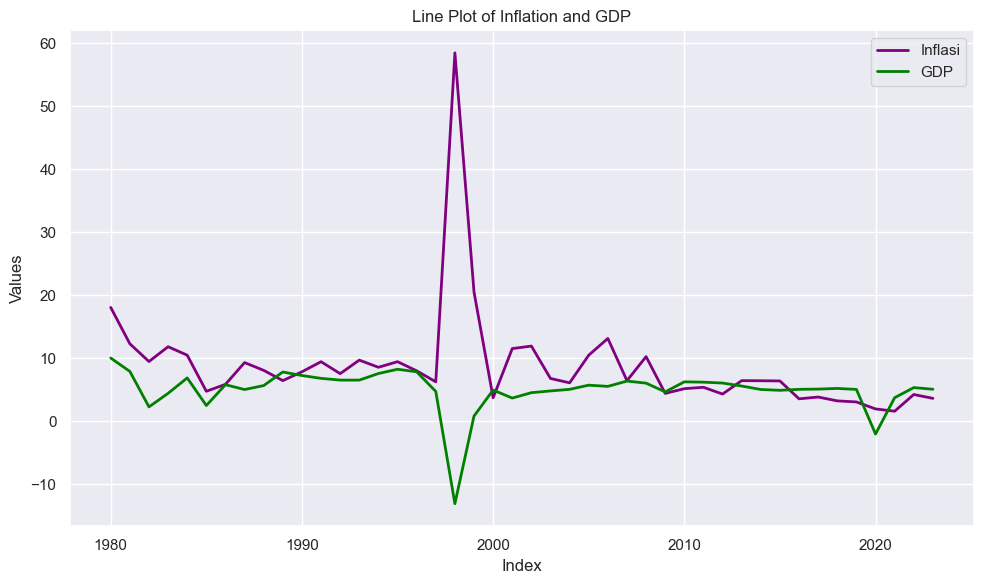

In [416]:
# Membuat plot untuk inflasi dan GDP
plt.figure(figsize=(10, 6))

# Line plot untuk inflasi
plt.plot(df['TAHUN'],df['INFLASI'], label='Inflasi', color='purple', linewidth=2)

# Line plot untuk GDP
plt.plot(df['TAHUN'],df['GDP'], label='GDP', color='green', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Line Plot of Inflation and GDP')
plt.xlabel('Index')
plt.ylabel('Values')

# Menambahkan legenda untuk membedakan antara inflasi dan GDP
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


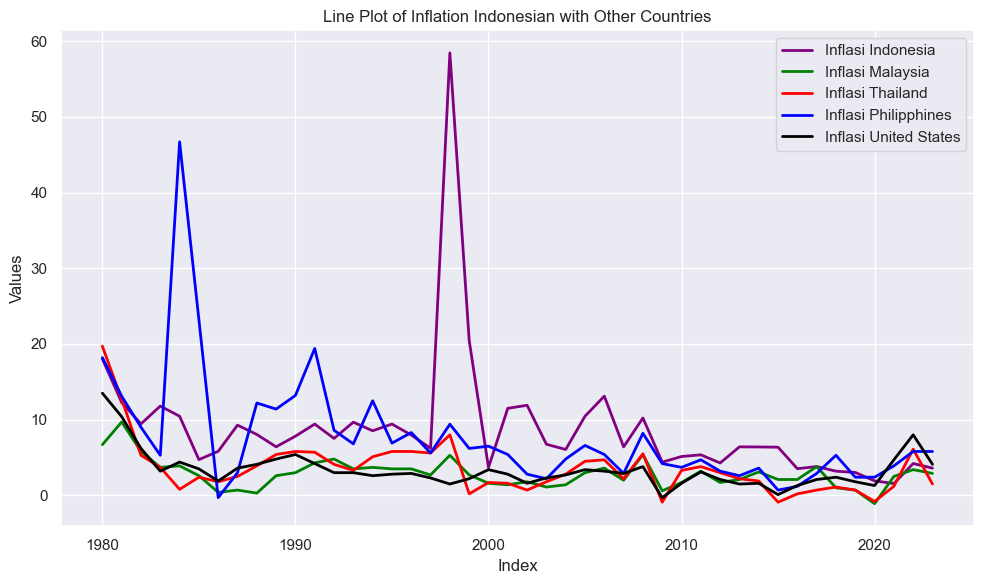

In [417]:
# Membuat plot untuk inflasi dan GDP
plt.figure(figsize=(10, 6))

# Line plot untuk inflasi Indonesia
plt.plot(df['TAHUN'],df['INFLASI'], label='Inflasi Indonesia', color='purple', linewidth=2)

# Line plot untuk Malaysia
plt.plot(df['TAHUN'],df['INFLASI_MALAYSIA'], label='Inflasi Malaysia', color='green', linewidth=2)
plt.plot(df['TAHUN'],df['INFLASI_THAILAND'], label='Inflasi Thailand', color='red', linewidth=2)
plt.plot(df['TAHUN'],df['INFLASI_PHILIPPHINES'], label='Inflasi Philipphines', color='blue', linewidth=2)
plt.plot(df['TAHUN'],df['INFLASI_UNITEDSTATES'], label='Inflasi United States', color='black', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Line Plot of Inflation Indonesian with Other Countries')
plt.xlabel('Index')
plt.ylabel('Values')

# Menambahkan legenda untuk membedakan antara inflasi dan GDP
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


berdasarkan grafik diatas terlihat kemungkinan terdapat korelasi antara Inflasi dengan GDP. Hal ini dibuktikan direntang tahun sekitar 1998-1999 terlihat ketika GDP turun secara drastis berkorespodensi dengan nilai inflasi yang sangat tinggi. Hal ini perlu diselidiki lebih lanjut dengan nilai korelasi

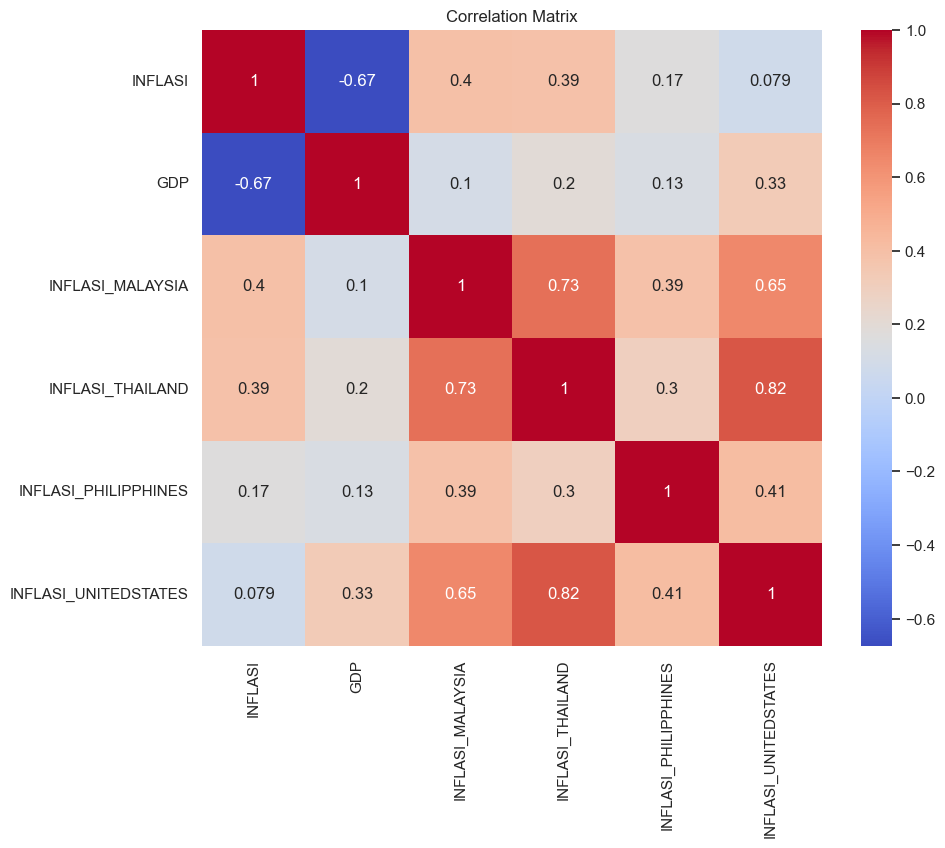

In [418]:
# Correlation matrix
correlation_matrix = df[df.columns[1:]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [419]:
print('KESIMPULAN : ')
for i in range(1,6):
    Index = correlation_matrix['INFLASI'].index[i]
    if abs(correlation_matrix['INFLASI'].iloc[i])>0.8:
        print(f'Inflasi Indonesia dengan {Index} memiliki Korelasi Sangat Kuat')
    elif abs(correlation_matrix['INFLASI'].iloc[i])>0.6:
        print(f'Inflasi Indonesia dengan {Index} memiliki Korelasi Kuat')
    elif abs(correlation_matrix['INFLASI'].iloc[i])>0.4:
        print(f'Inflasi Indonesia dengan {Index} memiliki Korelasi Sedang')
    elif abs(correlation_matrix['INFLASI'].iloc[i])>0.2:
        print(f'Inflasi Indonesia dengan {Index} memiliki Korelasi Rendah')
    elif abs(correlation_matrix['INFLASI'].iloc[i])>0.0:
        print(f'Inflasi Indonesia dengan {Index} memiliki Korelasi Sangat Rendah')



KESIMPULAN : 
Inflasi Indonesia dengan GDP memiliki Korelasi Kuat
Inflasi Indonesia dengan INFLASI_MALAYSIA memiliki Korelasi Rendah
Inflasi Indonesia dengan INFLASI_THAILAND memiliki Korelasi Rendah
Inflasi Indonesia dengan INFLASI_PHILIPPHINES memiliki Korelasi Sangat Rendah
Inflasi Indonesia dengan INFLASI_UNITEDSTATES memiliki Korelasi Sangat Rendah


Karena data inflasi negara lain memiliki korelasi yang rendah, sehingga feature tersebut dikecualikan untuk analisis lebih lanjut

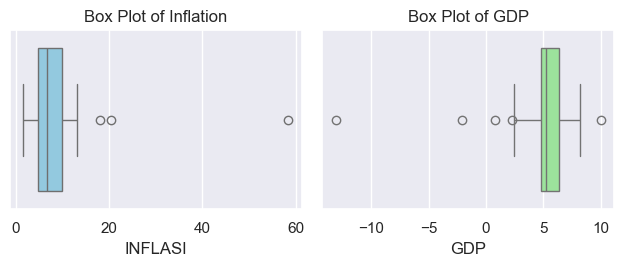

In [420]:
# Deteksi Outlier
# First plot: Box plot for INFLASI
plt.subplot(2, 2, 1)
sns.boxplot(x=df['INFLASI'], color='skyblue')
plt.title('Box Plot of Inflation')
plt.xlabel('INFLASI')
plt.tight_layout()

# Third plot: Box plot for GDP
plt.subplot(2, 2, 2)
sns.boxplot(x=df['GDP'], color='lightgreen')
plt.title('Box Plot of GDP')
plt.xlabel('GDP')
plt.tight_layout()

# Show the plots
plt.show()

Berdasarkan boxplot terdapat 3 outlier pada data 'INFLASI' dan 4 outlier pada data 'GDP'. data yang merupakan outlier ditampilkan sebagai berikut

In [421]:
Q1 = df['INFLASI'].quantile(0.25)
Q3 = df['INFLASI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[df['INFLASI']>upper_bound]

,TAHUN,INFLASI,GDP,INFLASI_MALAYSIA,INFLASI_THAILAND,INFLASI_PHILIPPHINES,INFLASI_UNITEDSTATES
0,1980,18.035430,10.000000,6.7,19.7,18.2,13.5
18,1998,58.451044,-13.126725,5.3,8.0,9.4,1.5
19,1999,20.477831,0.791126,2.7,0.2,6.2,2.2


In [422]:
Q1 = df['GDP'].quantile(0.25)
Q3 = df['GDP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['GDP'] < lower_bound) | (df['GDP'] > upper_bound)]

,TAHUN,INFLASI,GDP,INFLASI_MALAYSIA,INFLASI_THAILAND,INFLASI_PHILIPPHINES,INFLASI_UNITEDSTATES
0,1980,18.035430,10.000000,6.7,19.7,18.2,13.5
2,1982,9.445424,2.247191,5.8,5.3,9.0,6.2
18,1998,58.451044,-13.126725,5.3,8.0,9.4,1.5
19,1999,20.477831,0.791126,2.7,0.2,6.2,2.2
40,2020,1.920968,-2.065512,-1.1,-0.8,2.4,1.3


Indikasi outlier pada data 'INFLASI' menunjukkan terjadi pada tahun 1980,1998, dan 1999. Berdasarkan sumber berita, penyebabnya pada tahun 1980 terjadi krisis minyak dunia. Sedangkan tahun 1998-1999 terjadi Krisis moneter di Indonesia pada masa peralihan orde baru ke reformasi. Outlier pada 'INFLASI' berkorespodensi dengan nilai GDP yang sangat kecil dan terindikasi sebagai outlier. Selain itu, ada tambahan outlier pada GDP yaitu tahu 2020 karena efek pandemi covid-19, namun menariknya hal ini tidak mengakibatkan kenaikan pada INFLASI.

Keberadaan outlier akan mempengaruhi hasil prediksi model. Oleh karena itu pada analisis lebih lanjut akan dilakukan transformasi berdasarkan nilai skew data

In [423]:
df.skew()

TAHUN                        0.0
INFLASI                 4.708304
GDP                    -3.677466
INFLASI_MALAYSIA        1.095749
INFLASI_THAILAND        2.404417
INFLASI_PHILIPPHINES    3.278372
INFLASI_UNITEDSTATES    2.336933
dtype: object

nilai skewness 'INFLASI' sebesar 4.7 berarti terdapat data dengan inflasi yang sangat tinggi yang menarik rata-rata inflasi ke kanan
nilai skewness 'GDP' sebesar -3.7 berarti terdapat nilai GDP sangat rendah yang menarik rata-rata ke kiri.

Berdasarkan Tangga Transformasi Tukey, maka metode transformasi yang digunakan untuk INFLASI yaitu Log Transformation. Sedangkan untuk GDP menggunakan akar Kuadrat Transformation

In [424]:
df['Transform_INFLASI'] = np.log(df['INFLASI'])
df['Transform_GDP'] = np.sqrt(abs(df['GDP']))


In [425]:
df.skew()

TAHUN                        0.0
INFLASI                 4.708304
GDP                    -3.677466
INFLASI_MALAYSIA        1.095749
INFLASI_THAILAND        2.404417
INFLASI_PHILIPPHINES    3.278372
INFLASI_UNITEDSTATES    2.336933
Transform_INFLASI       0.466379
Transform_GDP           -0.42996
dtype: object

Feature "INFLASI" yang sudah ditransformasi menggunakan log menghasilkan distribusi data yang sedikit asimetri ke kanan, sementara itu hasil transformasi pada GDP berhasil membuat data yang sedikit asimetri ke kiri.

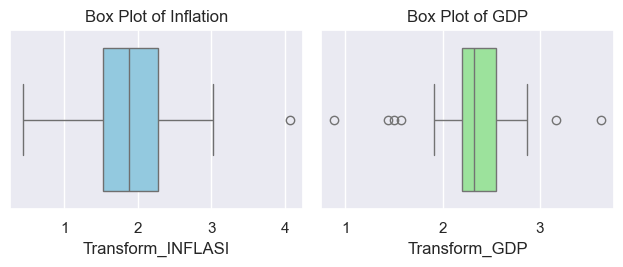

In [426]:
# Deteksi Outlier
# First plot: Box plot for INFLASI
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Transform_INFLASI'], color='skyblue')
plt.title('Box Plot of Inflation')
plt.xlabel('Transform_INFLASI')
plt.tight_layout()

# Third plot: Box plot for GDP
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Transform_GDP'], color='lightgreen')
plt.title('Box Plot of GDP')
plt.xlabel('Transform_GDP')
plt.tight_layout()

# Show the plots
plt.show()

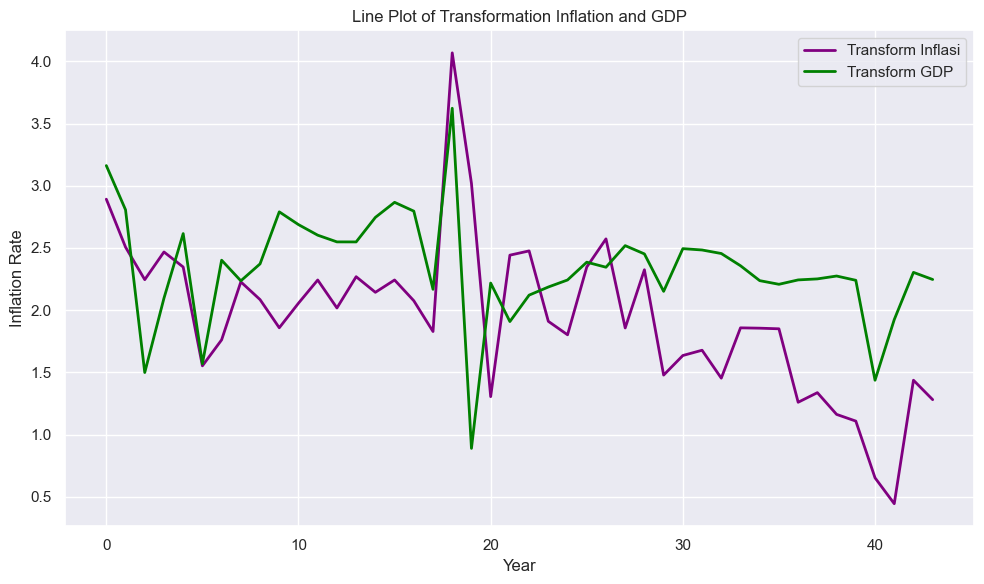

In [534]:
# Membuat plot untuk inflasi dan GDP
plt.figure(figsize=(10, 6))

# Line plot untuk inflasi
plt.plot(df['Transform_INFLASI'], label='Transform Inflasi', color='purple', linewidth=2)
plt.plot(df['Transform_GDP'], label='Transform GDP', color='green', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Line Plot of Transformation Inflation and GDP')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Menambahkan legenda untuk membedakan antara inflasi dan GDP
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

In [428]:
# Identifikasi data Stasioner
# Melakukan ADF Test
result_adf = adfuller(df['Transform_INFLASI'])

# Menampilkan hasil uji ADF
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])


ADF Statistic: -1.2414034166579753
p-value: 0.6555363780716948
Critical Values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}


karena p-value=0.65 >0.05, ,menunjukkan data yang akan diolah tidak stasioner, diperlukan differencing

In [429]:
df['diff_first_Transform_INFLASI'] = df['Transform_INFLASI'].diff()

In [430]:
# Identifikasi data Stasioner
# Melakukan ADF Test
result_adf = adfuller(df['diff_first_Transform_INFLASI'].iloc[1:])

# Menampilkan hasil uji ADF
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])

ADF Statistic: -9.648156960022659
p-value: 1.458857864764558e-16
Critical Values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}


Setelah dilakukan differencing, p-value < 0.05, oleh karena itu  bisa dilakukan tahap selanjutnya

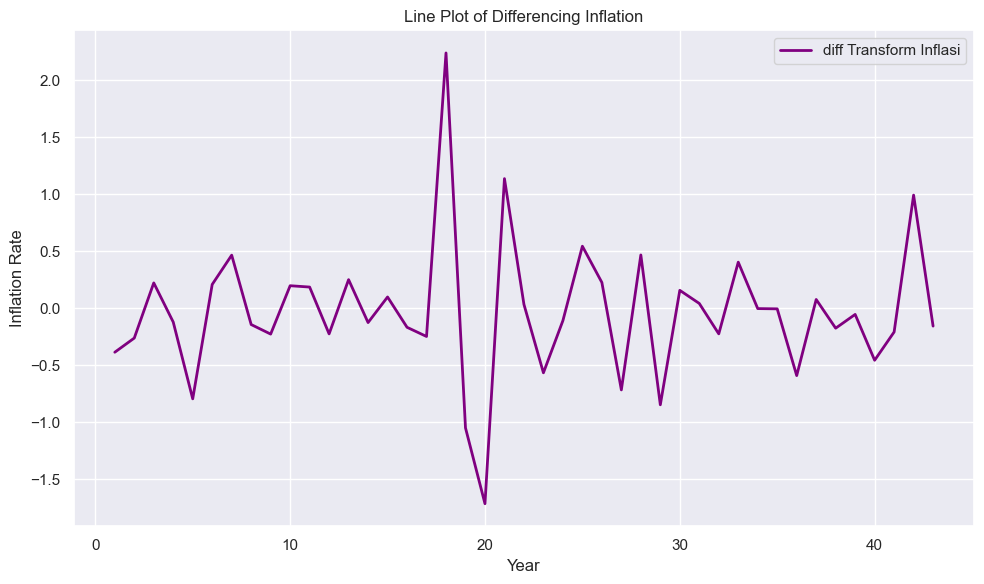

In [533]:
# Membuat plot untuk inflasi dan GDP
plt.figure(figsize=(10, 6))

# Line plot untuk inflasi
plt.plot(df['diff_first_Transform_INFLASI'], label='diff Transform Inflasi', color='purple', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Line Plot of Differencing Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Menambahkan legenda untuk membedakan antara inflasi dan GDP
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

Dari grafik diatas juga dapat dilihat bahwa data sudah stasioner, telihat bahwa data berada di sekitar rata-ratanya.

In [432]:
# Normalisasi data
cols_to_normalize = ['diff_first_Transform_INFLASI','Transform_GDP']

scaler = MinMaxScaler()

df[['normal_INFLASI','normal_GDP']]= scaler.fit_transform(df[cols_to_normalize])

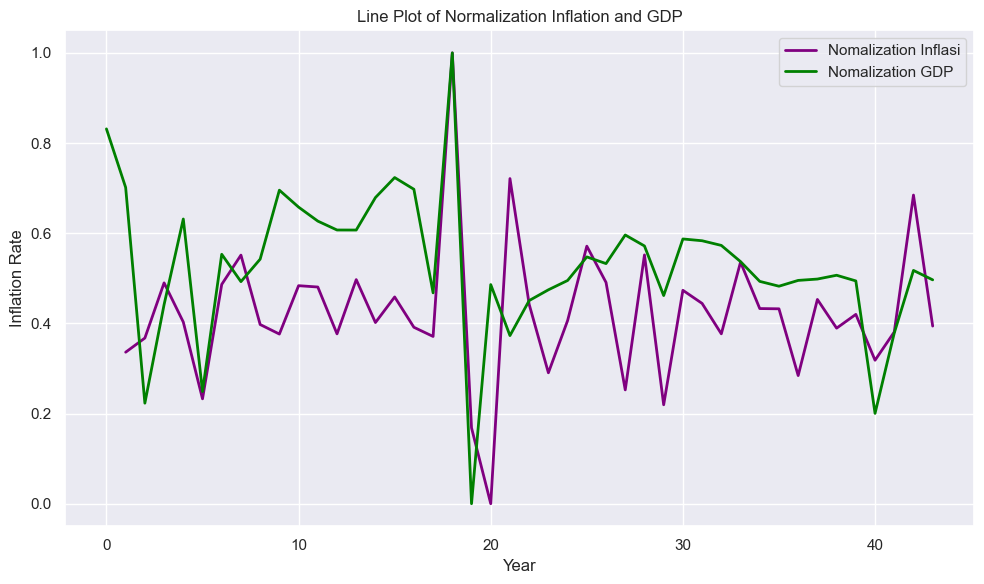

In [532]:
# Membuat plot untuk inflasi dan GDP
plt.figure(figsize=(10, 6))

# Line plot untuk inflasi
plt.plot(df['normal_INFLASI'], label='Nomalization Inflasi', color='purple', linewidth=2)
plt.plot(df['normal_GDP'], label='Nomalization GDP', color='green', linewidth=2)
# Menambahkan judul dan label sumbu
plt.title('Line Plot of Normalization Inflation and GDP')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Menambahkan legenda untuk membedakan antara inflasi dan GDP
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

# DATA MODELING

In [434]:
# Split Data
X = df['normal_GDP'].iloc[1:]
Y = df['normal_INFLASI'].iloc[1:]

In [435]:
split_ratio = 0.9

split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

## ARIMAX

<Figure size 1200x600 with 0 Axes>

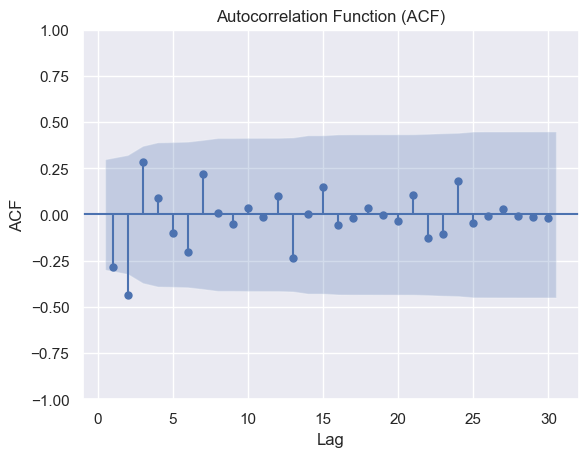

<Figure size 1200x600 with 0 Axes>

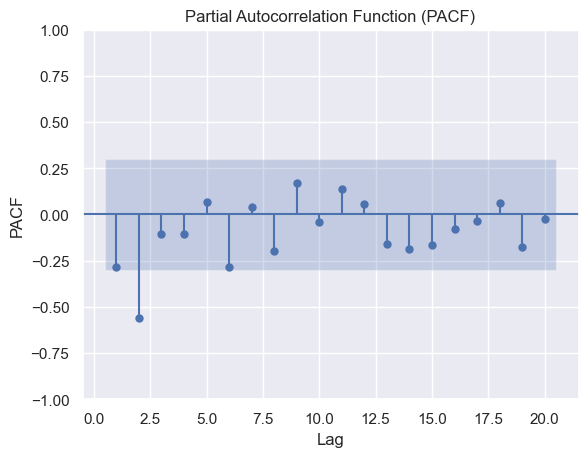

In [436]:
# Uji ACF PACF
# Uji ACF dan PACF
plt.figure(figsize=(12, 6))
plot_acf(df['normal_INFLASI'].iloc[1:], lags=30, zero=False)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['normal_INFLASI'].iloc[1:], lags=20, zero=False)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

dari plot ACF dan PACF, dapat ditentukan AR (p) = 1 dan MA(q) =1. Karena sebelumnya sudah dilakukan differencing, maka nilai d=0.

In [465]:
model_SARIMAX = SARIMAX(Y_train, exog=X_train, order=(1,0,1))
results = model_SARIMAX.fit()
print(results.summary())

c:\env\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\env\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         normal_INFLASI   No. Observations:                   38
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  21.442
Date:                Sun, 20 Oct 2024   AIC                            -34.884
Time:                        05:20:06   BIC                            -28.333
Sample:                             0   HQIC                           -32.553
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
normal_GDP     0.7759      0.029     26.725      0.000       0.719       0.833
ar.L1          0.0710      0.381      0.186      0.852      -0.676       0.818
ma.L1         -0.3921      0.402     -0.974      0.3

In [512]:
forecast_train = results.get_forecast(steps=len(X_train), exog=X_train)
forecast_test = results.get_forecast(steps=len(X_test), exog=X_test)
forecast_mean_train = forecast_train.predicted_mean
forecast_mean_test = forecast_test.predicted_mean
forecast_ci = forecast_test.conf_int()

forecast_df = pd.DataFrame({'Forecast_test': forecast_mean_test})
forecast_df['Lower CI'] = forecast_ci.iloc[:, 0]
forecast_df['Upper CI'] = forecast_ci.iloc[:, 1]

forecast_df.index = pd.RangeIndex(2019,2024,1)
forecast_mean_train.index = pd.RangeIndex(1981,2019,1)
forecast_mean_test.index = pd.RangeIndex(2019,2024,1)
X.index = pd.RangeIndex(1981,2024,1)

c:\env\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\env\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\env\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [510]:
MAPE_SARIMAX = mean_absolute_percentage_error(Y_test,forecast_mean_test)
MAPE_SARIMAX


0.25464269275390616

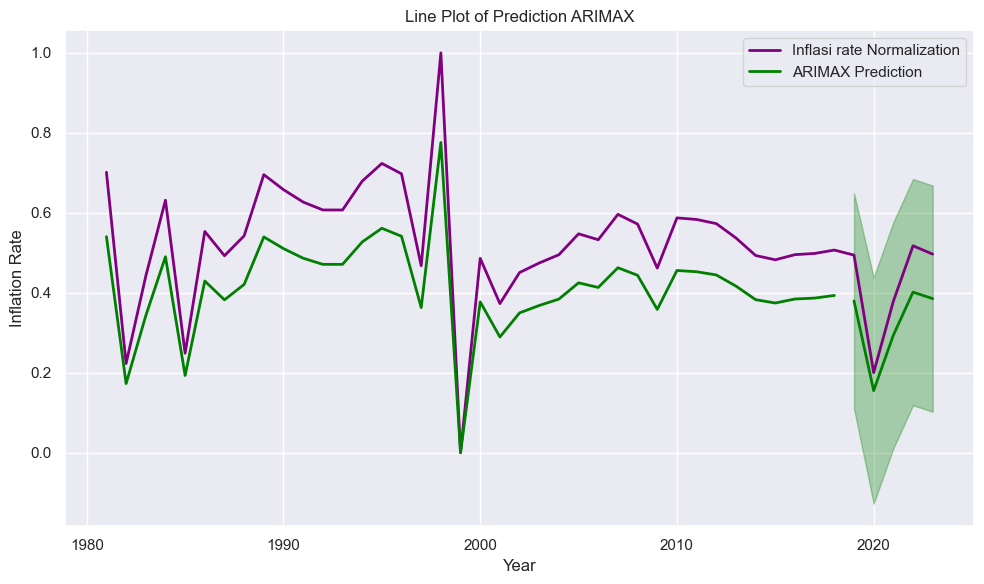

In [517]:
# Membuat plot untuk inflasi dan GDP
plt.figure(figsize=(10, 6))

# Line plot untuk inflasi
plt.plot(X, label='Inflasi rate Normalization', color='purple', linewidth=2)
plt.plot(forecast_mean_train, label='ARIMAX Prediction', color='green', linewidth=2)
plt.plot(forecast_mean_test, color='green', linewidth=2)
plt.fill_between(forecast_df.index,forecast_df['Lower CI'],forecast_df['Upper CI'],color='green',alpha=0.3)
# Menambahkan judul dan label sumbu
plt.title('Line Plot of Prediction ARIMAX')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Menambahkan legenda untuk membedakan antara inflasi dan GDP
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

Dari visualisasi, hasil prediksi dari model ARIMAX dapat mengikuti pola data aslinya dan dapat terlihat bahwa data berada pada interval kepercayaan. Hal ini membuktikan bahwa model berhasil memprediksi data Inflasi dengan baik. Oleh karena itu selanjutnya akan dicoba untuk memprediksi Inflasi untuk 3 tahun selanjutnya dengan menggunakan nilai GDP rata-rata.

In [522]:
X_mean = pd.DataFrame({'GDP_mean':[X.mean(),X.mean(),X.mean()]})
forecast_3years = results.get_forecast(steps=len(X_mean), exog=X_mean)
forecast_mean_3years = forecast_3years.predicted_mean
forecast_ci_3years = forecast_3years.conf_int()

forecast_df_3years = pd.DataFrame({'Forecast_test': forecast_mean_3years})
forecast_df_3years['Lower CI'] = forecast_ci_3years.iloc[:, 0]
forecast_df_3years['Upper CI'] = forecast_ci_3years.iloc[:, 1]

forecast_df_3years.index = pd.RangeIndex(2024,2027,1)

c:\env\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\env\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


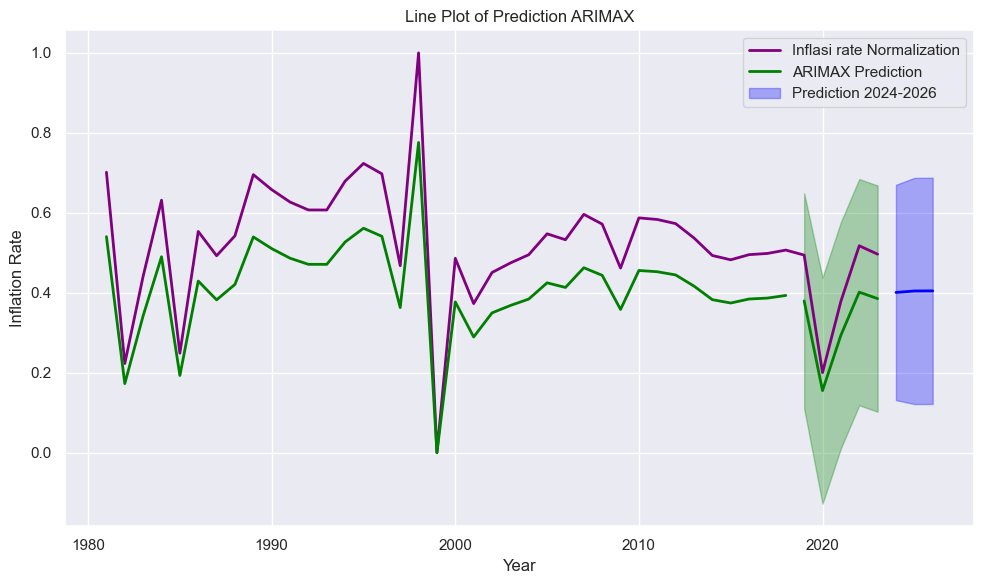

In [531]:
# Membuat plot untuk inflasi dan GDP
plt.figure(figsize=(10, 6))

# Line plot untuk inflasi
plt.plot(X, label='Inflasi rate Normalization', color='purple', linewidth=2)
plt.plot(forecast_mean_train, label='ARIMAX Prediction', color='green', linewidth=2)
plt.plot(forecast_mean_test, color='green', linewidth=2)
plt.plot(forecast_df_3years['Forecast_test'], color='blue', linewidth=2)
plt.fill_between(forecast_df.index,forecast_df['Lower CI'],forecast_df['Upper CI'],color='green',alpha=0.3)
plt.fill_between(forecast_df_3years.index,forecast_df_3years['Lower CI'],forecast_df_3years['Upper CI'],color='blue',alpha=0.3,label='Prediction 2024-2026')
# Menambahkan judul dan label sumbu
plt.title('Line Plot of Prediction ARIMAX')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Menambahkan legenda untuk membedakan antara inflasi dan GDP
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

Hasil visualisasi diatas menunjukkan hasil prediksi untuk 2024-2026